In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
events = pd.read_csv('data/llc-workshop-data.csv')
events['date'] = pd.to_datetime(events['Date Attending'])
events['month'] = events['date'].dt.month

In [3]:
ind = events['Event Name'].str.find('National Learn to Code Day') >= 0
ind = ind & (events['month'] == 11)
events[ind]

,Event Name,Event ID,Order #,Order Date,Quantity,Ticket Type,Attendee #,Date Attending,Order Type,Gender,How did you hear about this event?,date,month
5279,National Learn to Code Day: Intro to HTML & CS...,13209711603,356187119,2014-10-10,1,Register to mentor,450472457,2014-11-08,Free Order,NaN,Other,2014-11-08,11


In [4]:
for name in events.loc[ind, 'Event Name']:
    print(name)

National Learn to Code Day: Intro to HTML & CSS in Vancouver! (ages 8-13)


In [5]:
event_id = int(events.loc[ind, 'Event ID'])
event_id

13209711603

In [6]:
events[events['Event ID'] == event_id]

,Event Name,Event ID,Order #,Order Date,Quantity,Ticket Type,Attendee #,Date Attending,Order Type,Gender,How did you hear about this event?,date,month
5274,Girls Learning Code Day: Intro to HTML & CSS i...,13209711603,352026737,2014-10-02,1,Register a Girl & Parent/Guardian,445287897,2014-11-08,Free Order,NaN,Other,2014-11-08,11
5275,Girls Learning Code Day: Intro to HTML & CSS i...,13209711603,353034505,2014-10-05,1,Register a Girl & Parent/Guardian,446552415,2014-11-08,Free Order,NaN,From a Friend,2014-11-08,11
5276,Girls Learning Code Day: Intro to HTML & CSS i...,13209711603,353034505,2014-10-05,1,Register a Girl & Parent/Guardian,446552419,2014-11-08,Free Order,NaN,Other,2014-11-08,11
5277,Girls Learning Code Day: Intro to HTML & CSS i...,13209711603,354093537,2014-10-07,1,Register a Girl & Parent/Guardian,447869453,2014-11-08,Free Order,NaN,From a Friend,2014-11-08,11
5278,Girls Learning Code Day: Intro to HTML & CSS i...,13209711603,354987441,2014-10-08,1,Register a Girl & Parent/Guardian,448978279,2014-11-08,Free Order,NaN,From a Friend,2014-11-08,11
5279,National Learn to Code Day: Intro to HTML & CS...,13209711603,356187119,2014-10-10,1,Register to mentor,450472457,2014-11-08,Free Order,NaN,Other,2014-11-08,11
5280,Girls Learning Code Day: Intro to HTML & CSS i...,13209711603,356406519,2014-10-11,1,Register to mentor,450742683,2014-11-08,Free Order,NaN,Other,2014-11-08,11
5281,Girls Learning Code Day: Intro to HTML & CSS i...,13209711603,356875759,2014-10-12,1,Register a Girl & Parent/Guardian,451322811,2014-11-08,Free Order,NaN,Other,2014-11-08,11
5282,Girls Learning Code Day: Intro to HTML & CSS i...,13209711603,357160335,2014-10-13,1,Register a Girl & Parent/Guardian,451665465,2014-11-08,Free Order,NaN,From a Friend,2014-11-08,11
5283,Girls Learning Code Day: Intro to HTML & CSS i...,13209711603,357322717,2014-10-13,1,Register a Girl & Parent/Guardian,451864891,2014-11-08,Free Order,NaN,Other,2014-11-08,11


In [7]:
def parse_event_name(name):
    """Return a pandas Series with event name parsed into event and city"""
    event, city = name, None
    
    # Small workaround to keep some patterns from being mistaken for cities
    event = event.replace('(Responsive Design)', '[Responsive Design]')
    event = event.replace(' - Holiday Edition', '[Holiday Edition]')

    # Check for cities listed as '(Vancouver Edition)', '(Vancouver)', '(Winnipeg Launch)', etc.
    matches = re.findall('\([A-Z][a-z]+.*\)', event)
    if len(matches) > 0:
        event = event.replace(matches[0], '').strip()      
        city = matches[0].replace('(', '').replace(')', '')
        city = city.replace('Edition', '').replace('Launch', '').strip()
        
    # Check for cities listed as 'in Vancouver', 'in Toronto', etc.
    matches = re.findall(' in [A-z][a-z]+', event)
    if len(matches) > 0:
        event = event.replace(matches[0], '').strip()
        city = matches[0].replace(' in ', '').strip()
   
    # Check for cities listed as ' - Vancouver', ' - Toronto', etc.
    matches = re.findall(' - [A-z][a-z]+', event)
    if len(matches) > 0:
        event = event.replace(matches[0], '').strip()
        city = matches[0].replace(' - ', '').strip()
    
    # Some events are named 'Intro to' and others are 'Introduction to'
    # Let's standardize them to all use the same convention
    event = event.replace('Introduction to', 'Intro to')
    
    # Return the output as a pandas Series
    output = pd.Series({'Event Name' : name,
                        'Event Name (standardized)' : event,
                        'City' : city})
    return output

In [8]:
# Parse all the event names in our data and add columns with the standardized
# event name and the city name
df = events['Event Name'].apply(parse_event_name).fillna('N/A')
events = events.join(df[['Event Name (standardized)', 'City']], how='outer')
events[['Event Name', 'Event Name (standardized)', 'City']].head()

,Event Name,Event Name (standardized),City
0,Introduction to HTML & CSS in Toronto,Intro to HTML & CSS,Toronto
1,Introduction to HTML & CSS in Toronto,Intro to HTML & CSS,Toronto
2,Introduction to HTML & CSS in Toronto,Intro to HTML & CSS,Toronto
3,Introduction to HTML & CSS in Toronto,Intro to HTML & CSS,Toronto
4,Introduction to HTML & CSS in Toronto,Intro to HTML & CSS,Toronto


In [9]:
events['Event Name (standardized)'].value_counts().head()

Intro to HTML & CSS                                                                   1150
National Learn to Code Day 2014 Intro to HTML & CSS: Building a Multi-Page Website     705
WordPress for Beginners                                                                568
Girls Learning Code Day: Intro to HTML & CSS! (ages 8-13)                              454
Intro to JavaScript                                                                    413
Name: Event Name (standardized), dtype: int64

In [10]:
name = 'National Learn to Code Day 2014 Intro to HTML & CSS: Building a Multi-Page Website'

events[events['Event Name (standardized)'] == name].groupby('month').sum()

,Event ID,Order #,Quantity,Attendee #
month,,,,
9,8625959678603,237666244931,705,300574263471


In [11]:
events[events['Event Name (standardized)'] == name].groupby('City').sum()

,Event ID,Order #,Quantity,Attendee #,month
City,,,,,
Barrie,353381889745,9778966483,29,12367635943,261
Calgary,500665492967,13862696001,41,17532884269,369
Edmonton,525092685357,14263405301,43,18036046483,387
Fredericton,207592941075,5825213789,17,7368121331,153
Halifax,610562358450,16846167506,50,21305210624,450
Hamilton,415192088714,11559986500,34,14621038642,306
Montreal,622786086951,17256973411,51,21825775237,459
Ottawa,549463515165,15111071377,45,19110191859,405
Saskatoon,549519211755,15365137611,45,19434394175,405


In [12]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


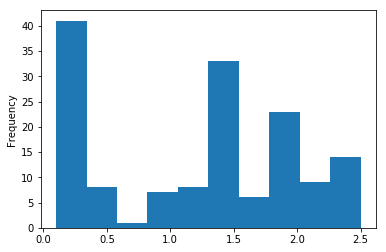

In [13]:
iris['petal_width'].plot.hist()